# 인공지능기초 2주차 실습

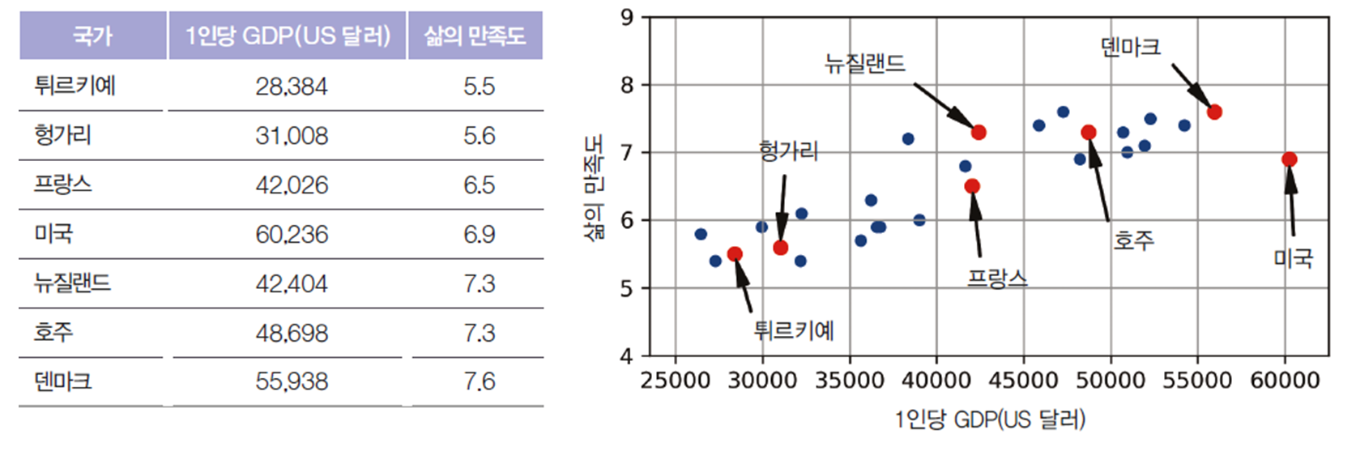

[국가별 1인당 GDP](https://www.imf.org/external/datamapper/NGDPDPC@WEO/OEMDC/ADVEC/WEOWORLD)와 [더 나은 삶의 지표(Better Life Index)](https://data-explorer.oecd.org/vis?tenant=archive&df[ds]=DisseminateArchiveDMZ&df[id]=DF_BLI&df[ag]=OECD&dq=...&to[TIME]=false)에서 추출한 삶의 만족도 간의 관계를 **머신러닝 모델**을 통해 분석한다.<br>
이로부터 "돈이 사람을 행복하게 만든다"라는 가설을 검증해본다.

## 단계 1. 데이터 준비

데이터는 [Life satisfaction and GDP per capita](https://github.com/ageron/data/tree/main/lifesat)에서 구할 수 있다.

우선, 필요한 라이브러리를 불러온다

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

데이터를 불러오고, 제대로 불러온지 확인한다.

In [2]:
data_path = "https://raw.githubusercontent.com/ageron/data/refs/heads/main/lifesat/lifesat.csv"

In [4]:
data = pd.read_csv(data_path)       # csv 파일을 읽는 Pandas 함수 필요
data.head()

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


우리는 불러온 데이터에서 <code>GDP per capita (USD)</code>를 예측변수(속성, feature)로 설정하고, <code>Life satisfaction</code>를 타겟(target)변수로 설정한다.

In [5]:
X = data[["GDP per capita (USD)"]].values
Y = data[["Life satisfaction"]].values

In [6]:
#X, Y shift+enter로 결과값 출력해보기
X

array([[26456.38793813],
       [27287.08340093],
       [28384.98778463],
       [29932.49391006],
       [31007.76840654],
       [32181.15453723],
       [32238.15725928],
       [35638.42135118],
       [36215.44759073],
       [36547.73895598],
       [36732.03474403],
       [38341.30757041],
       [38992.14838075],
       [41627.12926943],
       [42025.61737306],
       [42404.39373816],
       [45856.62562648],
       [47260.80045844],
       [48210.03311134],
       [48697.83702825],
       [50683.32350972],
       [50922.35802345],
       [51935.60386182],
       [52279.72885136],
       [54209.56383573],
       [55938.2128086 ],
       [60235.7284917 ]])

설정한 두 변수를 그래프로 나타내어 확인해본다.

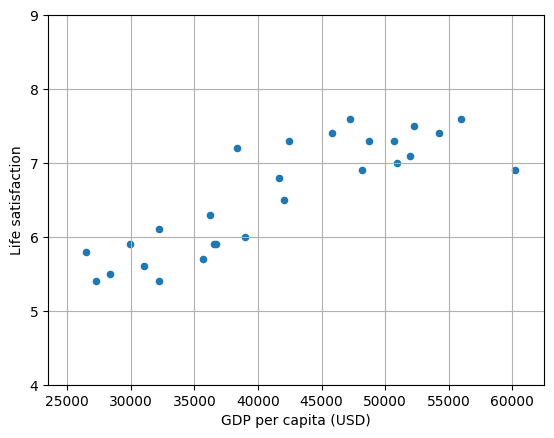

In [7]:
data.plot(kind='scatter', grid=True, x = "GDP per capita (USD)", y = "Life satisfaction")        # 데이터를 표현하기에 적합한 그래프 형식 지정 필요
plt.axis([23_500, 62_500, 4, 9])
plt.show()

## 단계 2. 모델 선택

위에서 지정한 속성과 타겟을 활용하는 선형 회귀(linear regression) 모델을 선택한다.

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

## 단계 3. 모델 훈련

In [9]:
model.fit(X, Y)        # 사이킷런(sckit-learn)에서 훈련을 위해 사용하는 함수 지정 필요

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


완성된 식은 아래와 같다.

In [10]:
w = model.coef_[0, 0]
b = model.intercept_[0]

print(f"y = {w} * X + {b}")

y = 6.778899694341222e-05 * X + 3.7490494273769093


## 단계 4.

모델 훈련이 끝났기 때문에, 새로운 데이터에 대해서 예측값을 구해본다.(**예측**(prediction) 또는 **추론**(inference))

In [11]:
X_Cyprus = [[37655]]
Y_Cyprus = model.predict(X_Cyprus)          # 사이킷런(scikit-learn)에서 예측을 위해 사용하는 함수 지정 필요

In [12]:
print(f"키프로스의 삶의 만족도 : {Y_Cyprus[0, 0]:.5f}")

키프로스의 삶의 만족도 : 6.30164


참고) 위의 결과를 모두 그래프로 나타내면 다음 식을 이용할 수 있다.

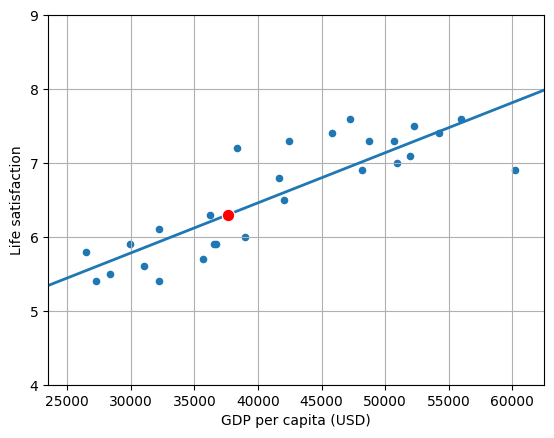

In [13]:
import numpy as np
ax = data.plot(kind='scatter', grid=True, x = "GDP per capita (USD)", y = "Life satisfaction")     # 적합한 그래프 형태 지정

y_min, y_max = 4, 9
x_min, x_max = 23_500, 62_500
xs = np.linspace(x_min, x_max, 200).reshape(-1, 1)
ys = model.predict(xs)          # 예측을 위해 사용하는 사이킷런 함수
ax.plot(xs, ys, linewidth=2)

x_c = 37_655
y_c = float(model.predict([[x_c]]).item())    # 예측을 위해 사용하는 사이킷런 함수
ax.scatter([x_c], [y_c], c='red', s=80, edgecolors='white', linewidths=0.8, zorder=5)

plt.axis([x_min, x_max, y_min, y_max])
plt.show()

## 숙제

다음의 데이터 경로에 대해서 <code>sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)</code> 모델을 사용하여 예측을 해본다.

In [14]:
new_data_path = "https://raw.githubusercontent.com/ageron/data/refs/heads/main/lifesat/lifesat_full.csv"

In [15]:
new_data = pd.read_csv(new_data_path)
X = new_data[["GDP per capita (USD)"]].values
Y = new_data[["Life satisfaction"]].values

from sklearn.neighbors import KNeighborsRegressor
new_model = KNeighborsRegressor(n_neighbors=3)
new_model.fit(X, Y)

X_Cyprus = [[37655]]
Y_Cyprus = new_model.predict(X_Cyprus)
print(f"새로운 모델에 의한 키프로스의 삶의 만족도 : {Y_Cyprus[0, 0]:.5f}")

새로운 모델에 의한 키프로스의 삶의 만족도 : 6.33333
